In [2]:
import pandas as pd

diagnosis_df = pd.read_csv(r'/home/archlinux/Drive-A/Lung_sound_Dtaset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', names=['Patient ID', 'Diagnosis'])
diagnosis_df['basicDiagnosis'] = diagnosis_df['Diagnosis'].apply(lambda x: 'Healthy' if x =='Healthy'  else 'Unhealthy')
diagnosis_df.head(10)

,Patient ID,Diagnosis,basicDiagnosis
0,101,URTI,Unhealthy
1,102,Healthy,Healthy
2,103,Asthma,Unhealthy
3,104,COPD,Unhealthy
4,105,URTI,Unhealthy
5,106,COPD,Unhealthy
6,107,COPD,Unhealthy
7,108,LRTI,Unhealthy
8,109,COPD,Unhealthy
9,110,COPD,Unhealthy


In [3]:
df_no_diagnosis = pd.read_csv(r'/home/archlinux/Drive-A/Lung_sound_Dtaset/demographic_info.txt', names = 
                 ['Patient ID', 'Age', 'Gender' , 'BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                 delimiter = ' ')
df_no_diagnosis.head(10)

,Patient ID,Age,Gender,BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
5,106,73.00,F,21.00,NaN,NaN
6,107,75.00,F,33.70,NaN,NaN
7,108,3.00,M,NaN,NaN,NaN
8,109,84.00,F,33.53,NaN,NaN
9,110,75.00,M,25.21,NaN,NaN


In [4]:
df =  df_no_diagnosis.join(diagnosis_df.set_index('Patient ID'), on = 'Patient ID', how = 'left')
df.head(10)

,Patient ID,Age,Gender,BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis,basicDiagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI,Unhealthy
1,102,0.75,F,NaN,9.8,73.0,Healthy,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma,Unhealthy
3,104,70.00,F,28.47,NaN,NaN,COPD,Unhealthy
4,105,7.00,F,NaN,32.0,135.0,URTI,Unhealthy
5,106,73.00,F,21.00,NaN,NaN,COPD,Unhealthy
6,107,75.00,F,33.70,NaN,NaN,COPD,Unhealthy
7,108,3.00,M,NaN,NaN,NaN,LRTI,Unhealthy
8,109,84.00,F,33.53,NaN,NaN,COPD,Unhealthy
9,110,75.00,M,25.21,NaN,NaN,COPD,Unhealthy


In [5]:
import os as os

root= (r'/home/archlinux/Drive-A/Lung_sound_Dtaset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/')
filenames=[s.split('.')[0] for s in os.listdir(path = root) if '.txt' in s]
#getting data based on Tr,Al,Ar...
def extract_annotation_data(file_name,root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns=['Patient ID', 'Index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name + '.txt'), names=['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

i_list=[]
rec_annotations=[]
rec_annotations_dict={}

for s in filenames:   
    (i,a)=extract_annotation_data(s,root)
    i_list.append(i)
    rec_annotations.append(a)
    rec_annotations_dict[s]=a
    
recording_info=pd.concat(i_list,axis=0)
recording_info.head(10)

,Patient ID,Index,Chest location,Acquisition mode,Recording equipment
0,177,2b4,Pr,mc,AKGC417L
0,134,2b3,Ar,mc,LittC2SE
0,140,2b3,Tc,mc,LittC2SE
0,166,1p1,Pl,sc,Meditron
0,133,3p2,Pr,mc,AKGC417L
0,186,2b2,Pl,mc,AKGC417L
0,130,1p2,Pr,mc,AKGC417L
0,151,3p2,Tc,mc,AKGC417L
0,187,1b1,Ll,sc,Meditron
0,130,1p2,Pl,mc,AKGC417L


In [6]:
len(rec_annotations_dict)

920

In [7]:
def slice_audio(audiodata,samplerate,start,end):
     start = samplerate * start 
     end   = samplerate * end
     return audiodata[start:end]

In [8]:
class Diagnosis():
    def __init__ (self, id, diagnosis, file_path):
        self.id = id
        self.diagnosis = diagnosis 
        self.file_path = file_path

In [9]:
def get_wav_files():
    audio_path = r'/home/archlinux/Drive-A/Lung_sound_Dtaset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
    files = [f for f in listdir(audio_path) if isfile(join(audio_path, f))]  
            #Gets all files in directory
    wav_files = [f for f in files if f.endswith('.wav')]  
            #to get .wav files it searches under this thing
    wav_files = sorted(wav_files)
    return wav_files, audio_path

In [10]:
from os import listdir
from os.path import isfile, join
def diagnosis_data():
    diagnosis = pd.read_csv(r'/home/archlinux/Drive-A/Lung_sound_Dtaset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv')
    wav_files, audio_path = get_wav_files()
    diag_dict = { 101 : "URTI"}  
    diagnosis_list = []
  
    for index , row in diagnosis.iterrows():
        diag_dict[row[0]] = row[1]     

    c = 0
    audio_data_list=[]
    for f in wav_files:
        diagnosis_list.append(Diagnosis(c, diag_dict[int(f[:3])], audio_path+f))
        #wav,s_rate = librosa.load(audio_path+f)
               
        if diag_dict[int(f[:3])] == "Healthy":           
            binary_classification_label="Healthy"          
        else:         
            binary_classification_label="UnHealthy"
       
        audio_data_list.append({'id':c,'diagnosis':diag_dict[int(f[:3])],'binary_diagnosis':binary_classification_label,'filename':f,'file_path':audio_path+f})
        c+=1  

    return diagnosis_list,pd.DataFrame(audio_data_list)

In [11]:
dataset_obj,dataset_df=diagnosis_data()

['URTI' 'Healthy' 'Asthma' 'COPD' 'LRTI' 'Bronchiectasis' 'Pneumonia'
 'Bronchiolitis']


/home/archlinux/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

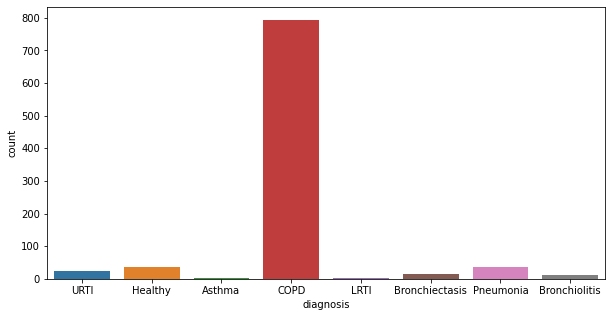

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
print(dataset_df['diagnosis'].unique())
plt.figure(figsize=(10,5))
sns.countplot(dataset_df['diagnosis'])

In [13]:
dataset_df.to_csv("DIagnosis.csv",index=False)
processed_dataset_df = dataset_df[ (dataset_df['diagnosis'] !='Asthma') &  (dataset_df['diagnosis'] !='LRTI') ]

/home/archlinux/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

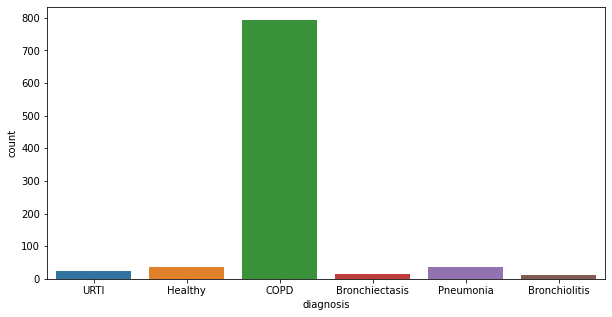

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(processed_dataset_df['diagnosis'])

In [15]:
processed_dataset_df.head(10)

,id,diagnosis,binary_diagnosis,filename,file_path
0,0,URTI,UnHealthy,101_1b1_Al_sc_Meditron.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
1,1,URTI,UnHealthy,101_1b1_Pr_sc_Meditron.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
2,2,Healthy,Healthy,102_1b1_Ar_sc_Meditron.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
4,4,COPD,UnHealthy,104_1b1_Al_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
5,5,COPD,UnHealthy,104_1b1_Ar_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
6,6,COPD,UnHealthy,104_1b1_Ll_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
7,7,COPD,UnHealthy,104_1b1_Lr_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
8,8,COPD,UnHealthy,104_1b1_Pl_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
9,9,COPD,UnHealthy,104_1b1_Pr_sc_Litt3200.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...
10,10,URTI,UnHealthy,105_1b1_Tc_sc_Meditron.wav,/home/archlinux/Drive-A/Lung_sound_Dtaset/Resp...


In [16]:
import librosa
audio_file, samplerate = librosa.core.load(processed_dataset_df.file_path[0])

In [17]:
# Preprocessing parameters

sr = 44100 # Sampling rate
duration = 10
hop_length = 347
fmin = 20

fmax = sr // 2
n_mels = 128

n_fft = n_mels * 20
samples = sr * duration

In [18]:
def downsample_mono(path, sr):    
    obj = wavio.read(path)
    wav = obj.data.astype(np.float32, order='F')
    rate = obj.rate
    
    try:
        channel = wav.shape[1]
        if channel == 2:
            wav = to_mono(wav.T)
        elif channel == 1:
            wav = to_mono(wav.reshape(-1))
    except IndexError:
        wav = to_mono(wav.reshape(-1))
        pass
    except Exception as exc:
        raise exc
    wav = resample(wav, rate, sr)
    wav = wav.astype(np.int16)
    return sr, wav

def read_audio(path):
    y, sr = librosa.core.load(path, sr=16000,duration=duration)

    return y

def audio_to_melspectrogram(audio,s_r,n_mel_val):
    #to convert to melspectrogram after audio is read in
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr = s_r,
                                                 n_mels = n_mel_val,
                                                 hop_length = hop_length,
                                                 n_fft = n_mel_val*20,
                                                 fmin = 20,
                                                 fmax = s_r//2)
    #dont really get the librosa thing, just get the feature.melspectrogram thing  
    
    return librosa.power_to_db(spectrogram).astype(np.float32)
def read_as_melspectrogram(path):
    #to convert audio into a melspectrogram so we can use machine learning
    mels = audio_to_melspectrogram(read_audio(path))
    return mels

def audio_to_melspectrogram2(audio,s_r,n_mel_val):
    #to convert to melspectrogram after audio is read by the librosa thing
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=s_r,
                                                 n_mels=n_mel_val,
                                                 hop_length=hop_length,
                                                 n_fft=n_mel_val*20,
                                                 fmin=20,
                                                 fmax=s_r//2)
    
    return librosa.power_to_db(spectrogram).astype(np.float32)

def read_as_melspectrogram2(path):
    #to convert audio into a melspectrogram so we can use ml
    mels = audio_to_melspectrogram2(read_audio(path))
    return mels

def convert_wav_to_image(df):
    
    X_mel_spec = []
    X_mel_spec2 = []
    for _,row in tqdm(df.iterrows()):
        x_mel1 = read_as_melspectrogram(row.file_path)
        x_mel2 = read_as_melspectrogram2(row.file_path)
        X_mel_spec.append(x_mel1.transpose(),)
        X_mel_spec2.append(x_mel2.transpose())      
    return X_mel_spec,X_mel_spec2

def convert_wav_to_mfcc(df):
    X_mfcc = []   
    for _,row in tqdm(df.iterrows()):
        x_mfcc =generate_mfcc_feature(row.file_path)
        X_mfcc.append(x_mfcc.transpose())
        
    return X_mfcc

def normalize(img):
    #to normalize an array (subtract mean and divide by sd-- sigma)
    eps = 0.001
    if np.std(img) != 0:
        img = (img - np.mean(img)) / np.std(img)
    else:
        img = (img - np.mean(img)) / eps
    return img

def normalize_dataset(X):
    #Normalizes list of arrays (subtract mean and divide by sd)
    normalized_dataset = []
    for img in X:
        normalized = normalize(img)
        normalized_dataset.append(normalized)
    return normalized_dataset

In [19]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
from typing import Tuple

def get_audio(file_path: str) -> Tuple[np.ndarray, int]:
    audio_data, sr = librosa.core.load(file_path)
    length = len(audio_data) / sr

    return audio_data, sr, length

#all the class stuff here
class AudioMovingWindowPreProcessor():
    def __init__(self) -> None:
        pass

    def get_audio_windows(self, audio: np.ndarray, sr: int, length: int, window_size: int, stride: int) -> np.ndarray:
        
        #to generate audio frames using  sliding window with stride -memory safe
        
        no_frames = int((length - window_size) / stride) + 1
        window_size = window_size * sr
        stride = stride * sr
        audio_frames = []
        for index in range(no_frames):
            if (stride * index + window_size) < len(audio):
                frame = audio[stride * index:(stride * index + window_size)]
                audio_frames.append(frame)

            else:
                break

        return np.array(audio_frames)

    def get_audio_windows_numpy_vectorized(self, audio: np.ndarray, sr: int, length: int, window_size: int,
                                           stride: int) -> np.ndarray:
        
        #to generate audio frames using sliding window with stride Numpy - non-memory safe
        
        no_frames = int((length - window_size) / stride) + 1
        audio_frames = as_strided(audio, shape=(no_frames, window_size * sr), strides=(stride * sr, 1))
        audio_frames = audio_frames[:-2]
        return audio_frames

In [20]:
from scipy import signal
from scipy import stats
import IPython.display as ipd
import librosa.display

#for wavelet ( denoising )

class Wavelet_Filter:

    def wavelet_filter(self, filteredSignal, samplerate):
        x_den = denoise_wavelet(filteredSignal, method='VisuShrink', mode='soft', wavelet_levels=5, wavelet='coif2',
                                rescale_sigma='True')

        return x_den, samplerate

#to pass through high_pass
class Filter_BW_HP:

    def __init__(self, high_pass):
        self.high_pass = high_pass

    def BW_highpass(self, newdata, samplerate):
        b, a = signal.butter(4, 100 / (22050 / 2), btype='highpass')

        filteredSignal = signal.lfilter(b, a, newdata)

        return filteredSignal, samplerate

#to pass through low_pass
class FIlter_BW_LP:

    def __init__(self, low_pass):
        self.low_pass = low_pass

    def BW_lowpass(self, filteredSignal, samplerate):
        c, d = signal.butter(4, 2000 / (22050 / 2), btype='lowpass')
        newFilteredSignal = signal.lfilter(c, d, filteredSignal)

        return newFilteredSignal, samplerate


class FilterPipeline():

    def __init__(self, low_pass, high_pass):

        self.low_pass = low_pass
        self.high_pass = high_pass

        self.lp_filter = FIlter_BW_LP(low_pass)
        self.hp_filter = Filter_BW_HP(high_pass)
        self.wavelet = Wavelet_Filter()

    def filters(self, audio_signal, sample_rate):
        filtered_output, sr = self.lp_filter.BW_lowpass(audio_signal, sample_rate)
        filtered_output, sr = self.hp_filter.BW_highpass(filtered_output, sr)
        filtered_output, sr = self.wavelet.wavelet_filter(filtered_output, sr)

        return filtered_output, sr

In [21]:
import math
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Filter Configurations
LOW_PASS_FREQUENCY = 100
HIGH_PASS_FREQUENCY = 2000

# Mel-Spectral Configurations
HOG_LENGTH = 347

# sizes (in sec)
MOVING_WINDOW_SIZE = 5
AUDIO_STRIDE_SIZE = 5

class AudioPreProcessor(AudioMovingWindowPreProcessor, FilterPipeline):
    def __init__(self):
        AudioMovingWindowPreProcessor.__init__(self)
        FilterPipeline.__init__(self, LOW_PASS_FREQUENCY, HIGH_PASS_FREQUENCY)
        super().__init__()

    def pre_process_audio(self, audio_path: str, sample_rate: int) -> np.ndarray:
        audio_data, sample_rate, length = get_audio(audio_path, sample_rate)
        filtered_audio, sample_rate = self.filters(audio_data, sample_rate)
        audio_frames = self.get_audio_windows(filtered_audio, sample_rate, length, MOVING_WINDOW_SIZE,
                                              AUDIO_STRIDE_SIZE)

        return audio_frames

    def audio_to_mel_spectrogram(self, audio_data: np.ndarray, s_r: int, n_mel_val: int) -> np.ndarray:
        spectrogram = librosa.feature.melspectrogram(audio_data,
                                                     sr=s_r,
                                                     n_mels=n_mel_val,
                                                     hop_length=HOG_LENGTH,
                                                     n_fft=n_mel_val * 20,
                                                     fmin=20,
                                                     fmax=s_r // 2)

        return librosa.power_to_db(spectrogram).astype(np.float32)

2022-01-12 22:26:03.448407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 22:26:03.448487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
# sizes (in sec)
MOVING_WINDOW_SIZE = 5
AUDIO_STRIDE_SIZE = 4
SAMPLE_RATE=16000

from tqdm import tqdm
# !mkdir breathcycles

X_mel_spec = []
X_mel_spec2 = []
Y_labels = []

durations_spec=[]
for  indx, df_row in tqdm(processed_dataset_df.iterrows() ):  
     head, audio_file = os.path.split(df_row.file_path)
     audio_file_name = audio_file.split('.wav')[0]   
     diagnosis_type =df_row.diagnosis
    
     breathing_cycles_df = rec_annotations_dict.get(audio_file_name)

     audio_data, sample_rate,length = get_audio(df_row.file_path)      
     no_frames = int((length - MOVING_WINDOW_SIZE) / AUDIO_STRIDE_SIZE) + 1
     window_size = MOVING_WINDOW_SIZE * sample_rate
     stride = AUDIO_STRIDE_SIZE * sample_rate

     audio_frames = []

     for index in range(no_frames):
            if (stride * index + window_size) < len(audio_data):              
               frame = audio_data[stride * index:(stride * index + window_size)]
               x_mel1 = audio_to_melspectrogram(frame,s_r=sample_rate,n_mel_val=128)
               x_mel2 = audio_to_melspectrogram2(frame,s_r=sample_rate,n_mel_val=64)
               X_mel_spec.append(x_mel1.transpose(),)
               X_mel_spec2.append(x_mel2.transpose())
            
               Y_labels.append(str(diagnosis_type))

            else:
                break
#has output,, shows [time, time/iteration]

917it [11:09,  1.37it/s]


In [23]:
X_mel1 = np.array(X_mel_spec)
X_mel2 = np.array(X_mel_spec2)

#X = normalize_dataset(X)
X_array_mel1=np.array(X_mel1)
X_array_mel2=np.array(X_mel2)

val_spae=[]
for x in X_mel1:
    #print(x.shape[0])-------
    val_spae.append(x.shape[0])

def Average(lst):
    return sum(lst) / len(lst) 
# Driver Code

average = Average(val_spae)
# to print average of the list
print("Average of the required list =", round(average, 2))

Average of the required list = 318.0


/home/archlinux/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/archlinux/.local/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

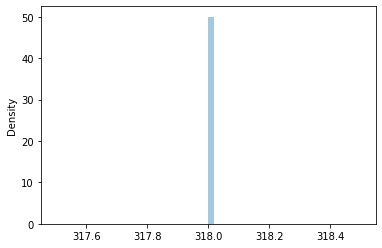

In [24]:
sns.distplot(val_spae)

In [25]:
max_audio_lenght = max([len(i) for i in X_array_mel1])
max_audio_lenght2 = max([len(i) for i in X_array_mel2])
from tensorflow.keras.preprocessing.sequence import pad_sequences

#raw data processing-padding
X_array_mel1=pad_sequences(X_array_mel1, padding="post", dtype='float32')
X_array_mel2=pad_sequences(X_array_mel2, padding="post", dtype='float32')

In [26]:
X_array_mel1[0].shape

(318, 128)

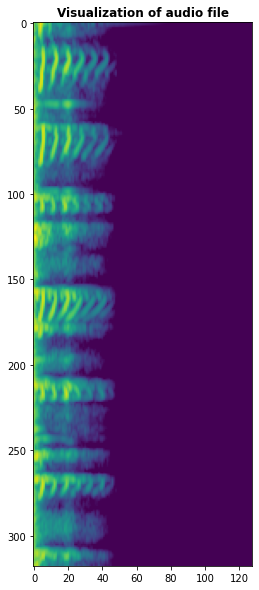

In [27]:
# Visualize an melspectogram example
plt.figure(figsize=(15,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(X_array_mel1[20]);

In [28]:
X_array_mel1.shape[0]

4035

In [29]:
shape_lenght=X_array_mel1.shape[0]
new_Xtrain = np.empty((shape_lenght,2), dtype=np.object)
for idx in range(shape_lenght):    
    new_Xtrain[idx,]=([X_array_mel1[idx],X_array_mel2[idx]])

In [30]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diagnosis_classes= list(set(Y_labels))
le.fit(diagnosis_classes)
y = le.transform(Y_labels)
Y=to_categorical(y, num_classes=len(diagnosis_classes))
np.save('diagnosis_classes.npy', le.classes_)

In [31]:
audio_time_span=new_Xtrain[0][0].shape[0]
no_mel_sp_features =new_Xtrain[0][0].shape[1]
NO_CLASSES=6 # Binary classification -> 2

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
from keras.layers.wrappers import TimeDistributed
from tensorflow.python.keras import regularizers
from keras.regularizers import l2
from keras.layers import LayerNormalization

def LSTM_Model_Dual(N_CLASSES,max_audio_length,no_features):
    
    i1 = Input(shape=(max_audio_length,no_features), dtype="float32",name='mel-spectral-input')
    x1 = tf.keras.layers.LayerNormalization(axis=2, name='batch_norm')(i1)
    x1 = TimeDistributed(layers.Reshape((-1,)), name='reshape')(x1)
    s1 = TimeDistributed(layers.Dense(64, activation='tanh'),
                        name='td_dense_tanh')(x1)  
    #masking
    x1 = layers.Bidirectional(layers.LSTM(128, return_sequences=True),name='LSTM_1-128')(s1)
    x1 = layers.Bidirectional(layers.LSTM(256, return_sequences=True),name='LSTM_1-256')(x1)
    x1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True),name='LSTM_1-64')(x1)
    #x1 = layers.Bidirectional(layers.LSTM(64),name='LSTM_2-64')(x1)
    
    x1 = layers.concatenate([s1, x1], axis=2, name='skip_connection')
    x1 = layers.Dense(64, activation='relu', name='dense_1_relu')(x1)
    x1 = layers.MaxPooling1D(name='max_pool_1d')(x1)
    x1 = layers.Dense(32, activation='relu', name='dense_2_relu')(x1)
    x1 = layers.Flatten(name='flatten')(x1)
    x1 = layers.Dropout(rate=0.2, name='dropout')(x1)
    x1 = layers.Dense(32, activation='relu',
                         activity_regularizer=l2(0.001),
                         name='dense_3_relu')(x1)
        
    i2=Input(shape=(max_audio_length,64), dtype="float32",name='mel-spectral2-input')
    x2 = LayerNormalization(axis=2, name='batch_norm_mel-spectral2')(i2)
    x2 = TimeDistributed(layers.Reshape((-1,)), name='reshape_mel-spectral2')(x2)
    s2 = TimeDistributed(layers.Dense(64, activation='tanh'),
                        name='td_dense_tanh_mel-spectral2')(x2)
    
    #masking
    x2 = layers.Bidirectional(layers.LSTM(128, return_sequences=True),name='mel-2-LSTM_1-128')(s2)
    x2 = layers.Bidirectional(layers.LSTM(256, return_sequences=True),name='mel-2-LSTM_1-256')(x2)
    x2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True),name='mel-2-LSTM_1-64')(x2)
    
    x2 = layers.concatenate([s2, x2], axis=2, name='skip_connection_mel-spectral2')
    x2 = layers.Dense(64, activation='relu', name='dense_1_relu_mel-spectral2')(x2)
    x2 = layers.MaxPooling1D(name='max_pool_1d_mfcc')(x2)
    x2 = layers.Dense(32, activation='relu', name='dense_2_relu_mel-spectral2')(x2)
    x2 = layers.Flatten(name='flatten_mel-spectral2')(x2)
    x2 = layers.Dropout(rate=0.2, name='dropout_mel-spectral2')(x2)
    x2 = layers.Dense(32, activation='relu',
                         activity_regularizer=l2(0.001),
                         name='dense_3_relu_mel-spectral2')(x2)
       
    x = layers.concatenate([x1, x2], name='mel-mfcc_connection')   
    o = layers.Dense(N_CLASSES, activation='softmax', name='softmax')(x)
    model = keras.Model(inputs=[i1,i2], outputs=o, name='dual_convolutional_long_short_term_memory')
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = LSTM_Model_Dual(NO_CLASSES,audio_time_span,no_mel_sp_features)
model.summary()

2022-01-12 22:38:09.386745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-12 22:38:09.386796: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-12 22:38:09.386822: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ArchMachine): /proc/driver/nvidia/version does not exist
2022-01-12 22:38:09.387123: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "dual_convolutional_long_short_term_memory"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mel-spectral-input (InputLayer) [(None, 318, 128)]   0                                            
__________________________________________________________________________________________________
mel-spectral2-input (InputLayer [(None, 318, 64)]    0                                            
__________________________________________________________________________________________________
batch_norm (LayerNormalization) (None, 318, 128)     256         mel-spectral-input[0][0]         
__________________________________________________________________________________________________
batch_norm_mel-spectral2 (Layer (None, 318, 64)      128         mel-spectral2-input[0][0]        
__________________________________________________________

In [33]:
def LSTM_model_V2(N_CLASSES,max_audio_length,no_features):
    
    i=Input(shape=(max_audio_length,no_features), dtype="float32")
    x = LayerNormalization(axis=2, name='batch_norm')(i)
    x = TimeDistributed(layers.Reshape((-1,)), name='reshape')(x)
    s = TimeDistributed(layers.Dense(64, activation='tanh'),
                        name='td_dense_tanh')(x)
    #masking
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True),
                             name='bidirectional_lstm')(s)
    x = layers.concatenate([s, x], axis=2, name='skip_connection')
    x = layers.Dense(64, activation='relu', name='dense_1_relu')(x)
    x = layers.MaxPooling1D(name='max_pool_1d')(x)
    x = layers.Dense(32, activation='relu', name='dense_2_relu')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dropout(rate=0.2, name='dropout')(x)
    x = layers.Dense(32, activation='relu',
                         activity_regularizer=l2(0.001),
                         name='dense_3_relu')(x)
    o = layers.Dense(N_CLASSES, activation='softmax', name='softmax')(x)
    model = keras.Model(inputs=i, outputs=o, name='long_short_term_memory')
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = LSTM_model_V2(NO_CLASSES,audio_time_span,no_mel_sp_features)
model.summary()

Model: "long_short_term_memory"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 318, 128)]   0                                            
__________________________________________________________________________________________________
batch_norm (LayerNormalization) (None, 318, 128)     256         input_1[0][0]                    
__________________________________________________________________________________________________
reshape (TimeDistributed)       (None, 318, 128)     0           batch_norm[0][0]                 
__________________________________________________________________________________________________
td_dense_tanh (TimeDistributed) (None, 318, 64)      8256        reshape[0][0]                    
_____________________________________________________________________________

In [34]:
# initialize tqdm callback with default parameters
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold
num_folds = 3

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
#inputs = np.concatenate((X_train, X_val), axis=0)
#targets = np.concatenate((Y_train, Y_val), axis=0)

# Define the K-fold Cross Validator
Strftkfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
k_fold_history=[]

#Custom callback
checkpoint_filepath = 'training_lstm_v2/cp.ckpt'
checkpoint_filepath = os.path.dirname(checkpoint_filepath)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    mode='max',
    save_best_only=True)

progressbar = keras.callbacks.ProgbarLogger(count_mode="samples", stateful_metrics=['acc','val_loss'])

#Keras callback
keras_callbacks = [model_checkpoint_callback,tqdm_callback]

#Setup Model
#model = build_lstm_model()
model = LSTM_Model_Dual(NO_CLASSES,audio_time_span,no_mel_sp_features)
class_labels = np.argmax(Y, axis=1)

# Loop through the indices the split() method returns
for index, (train_indices, val_indices) in enumerate(Strftkfold.split(new_Xtrain, class_labels)):

    # Generate batches from indices
    xtrain, xval = new_Xtrain[train_indices], new_Xtrain[val_indices]
    ytrain, yval = Y[train_indices], Y[val_indices]
        
    x_mel1= np.empty( ( int(xtrain.shape[0]) ,int(xtrain[0][0].shape[0]) , int(xtrain[0][0].shape[1]) ), dtype=np.float32)
    x_mel2= np.empty( ( int(xtrain.shape[0]) ,int(xtrain[0][1].shape[0]) , int(xtrain[0][1].shape[1]) ), dtype=np.float32)
    
    x_mel1_val= np.empty( ( int(xval.shape[0]) ,int(xval[0][0].shape[0]) , int(xval[0][0].shape[1]) ), dtype=np.float32)
    x_mel2_val= np.empty( ( int(xval.shape[0]) ,int(xval[0][1].shape[0]) , int(xval[0][1].shape[1]) ), dtype=np.float32)
    
    # Extracting 2 features into Numpy array- Training set
    for i,x in enumerate(xtrain):        
        x_mel1[i,]=x[0]
        x_mel2[i,]=x[1]

   # Extracting 2 features into Numpy array validation set
    for i,x in enumerate(xval):       
        x_mel1_val[i,]=x[0]
        x_mel2_val[i,]=x[1]
       
    #create a batch
    #train the model 
    history = model.fit({'mel-spectral-input':x_mel1,'mel-spectral2-input':x_mel2}, ytrain,batch_size=64,epochs=15,verbose=0,callbacks=keras_callbacks,validation_split=0.2)
    k_fold_history.append(history)
    
    # Generate generalization metrics
    scores = model.evaluate({'mel-spectral-input':x_mel1_val,'mel-spectral2-input':x_mel2_val}, yval, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%' )
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

2022-01-12 22:38:50.426510: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 350380032 exceeds 10% of free system memory.
2022-01-12 22:38:50.573362: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 175190016 exceeds 10% of free system memory.


Training:   0%|                                                                                 0/15 ETA: ?s, …

Epoch 1/15


2022-01-12 22:38:50.784939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0/34                                                                                                          …

2022-01-12 22:43:48.980757: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 2/15


0/34                                                                                                          …

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 3/15


0/34                                                                                                          …

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 4/15


0/34                                                                                                          …

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 5/15


0/34                                                                                                          …

Epoch 6/15


0/34                                                                                                          …

Epoch 7/15


0/34                                                                                                          …

Epoch 8/15


0/34                                                                                                          …

Epoch 9/15


0/34                                                                                                          …

Epoch 10/15


0/34                                                                                                          …

Epoch 11/15


0/34                                                                                                          …

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 12/15


0/34                                                                                                          …

Epoch 13/15


0/34                                                                                                          …

Epoch 14/15


0/34                                                                                                          …

INFO:tensorflow:Assets written to: training_lstm_v2/assets


INFO:tensorflow:Assets written to: training_lstm_v2/assets


Epoch 15/15


0/34                                                                                                          …

2022-01-13 00:04:04.044734: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 218987520 exceeds 10% of free system memory.


Score for fold 1: loss of 0.27421241998672485; accuracy of 92.11896061897278%


2022-01-13 00:05:41.052560: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 350380032 exceeds 10% of free system memory.
2022-01-13 00:05:44.896261: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 175190016 exceeds 10% of free system memory.


Training:   0%|                                                                                 0/15 ETA: ?s, …

Epoch 1/15


0/34                                                                                                          …

Epoch 2/15


0/34                                                                                                          …

Epoch 3/15


0/34                                                                                                          …

Epoch 4/15


0/34                                                                                                          …

Epoch 5/15


0/34                                                                                                          …

Epoch 6/15


0/34                                                                                                          …

Epoch 7/15


0/34                                                                                                          …

Epoch 8/15


0/34                                                                                                          …

Epoch 9/15


0/34                                                                                                          …

Epoch 10/15


0/34                                                                                                          …

Epoch 11/15


0/34                                                                                                          …

Epoch 12/15


0/34                                                                                                          …

Epoch 13/15


0/34                                                                                                          …

Epoch 14/15


0/34                                                                                                          …

Epoch 15/15


0/34                                                                                                          …

Score for fold 1: loss of 0.12626796960830688; accuracy of 97.32341766357422%


Training:   0%|                                                                                 0/15 ETA: ?s, …

Epoch 1/15


0/34                                                                                                          …

In [35]:
# Average scores ==
print('------------------------------------------------------------------------')
print('Validation Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Val Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Val Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Validation Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.35715141892433167 - Accuracy: 90.63196778297424%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.16877052187919617 - Accuracy: 95.61338424682617%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.1390315443277359 - Accuracy: 96.65427803993225%
------------------------------------------------------------------------
Average scores for all folds:
> Val Accuracy: 94.29987668991089 (+- 2.6281846439853465)
> Val Loss: 0.22165116171042124
------------------------------------------------------------------------


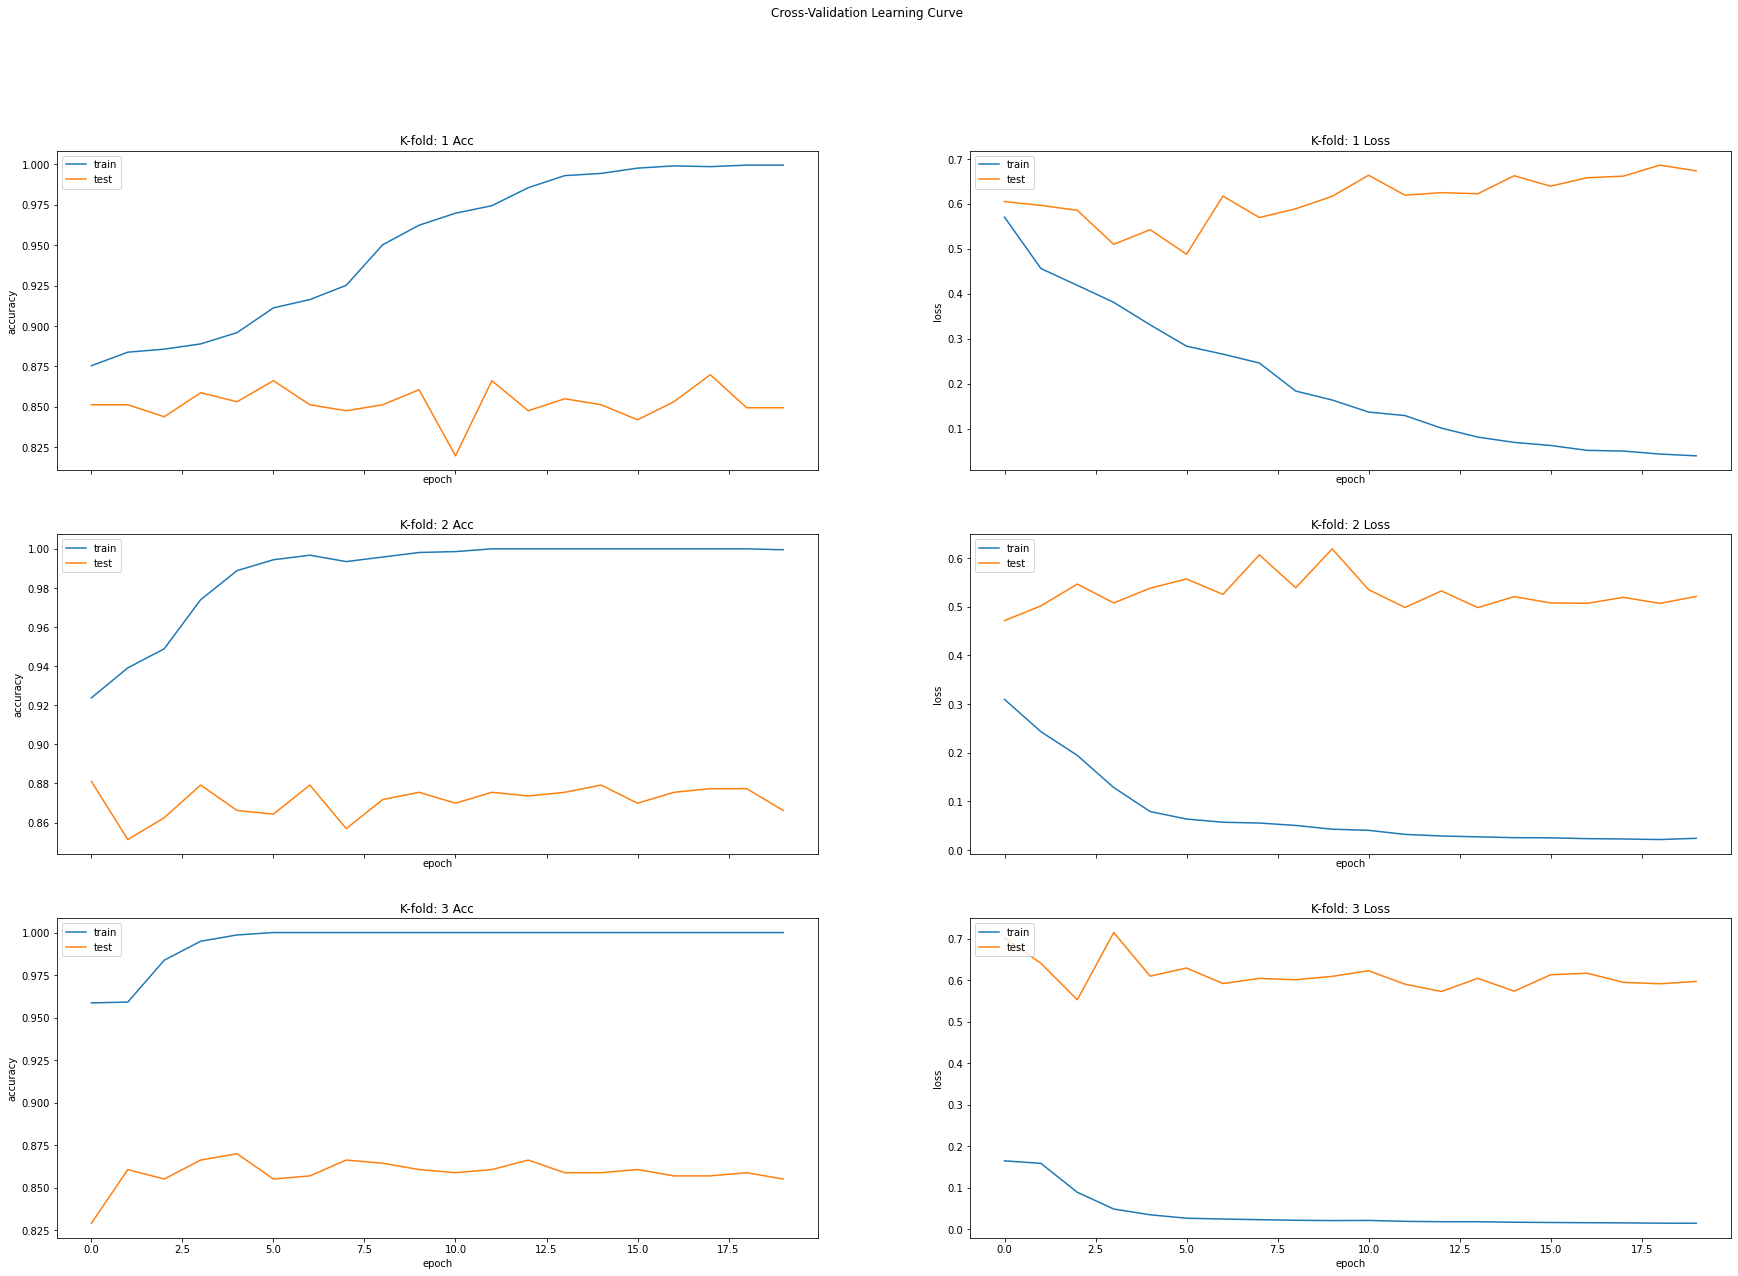

In [36]:
fig, axes = plt.subplots(num_folds, 2,sharex=True,figsize=(30,20))
fig.suptitle('Cross-Validation Learning Curve')

index_sub_plot=1
for history in k_fold_history:
    
    axes[index_sub_plot-1,0].set_title('K-fold: {} Acc'.format(index_sub_plot))
    axes[index_sub_plot-1,0].plot(history.history['accuracy'])
    axes[index_sub_plot-1,0].plot(history.history['val_accuracy'])
    axes[index_sub_plot-1,0].set_ylabel('accuracy')
    axes[index_sub_plot-1,0].set_xlabel('epoch')
    axes[index_sub_plot-1,0].legend(['train', 'test'], loc='upper left')
    
    axes[index_sub_plot-1,1].set_title('K-fold: {} Loss'.format(index_sub_plot))
    axes[index_sub_plot-1,1].plot(history.history['loss'])
    axes[index_sub_plot-1,1].plot(history.history['val_loss'])
    axes[index_sub_plot-1,1].set_ylabel('loss')
    axes[index_sub_plot-1,1].set_xlabel('epoch')
    axes[index_sub_plot-1,1].legend(['train', 'test'], loc='upper left')
    
    index_sub_plot+=1

In [37]:
!ls {checkpoint_filepath}

assets	keras_metadata.pb  saved_model.pb  variables


In [38]:
checkpoint_path = 'training_lstm_v2/saved_model.pb' 
checkpoint_dir = os.path.dirname(checkpoint_path)
optimal_model = tf.keras.models.load_model(checkpoint_dir)

In [39]:
optimal_model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


                precision    recall  f1-score   support

Bronchiectasis       1.00      0.33      0.50        21
 Bronchiolitis       0.67      0.78      0.72        18
          COPD       0.98      0.99      0.98      1180
       Healthy       0.74      0.83      0.78        47
     Pneumonia       0.83      0.69      0.76        49
          URTI       0.64      0.60      0.62        30

      accuracy                           0.95      1345
     macro avg       0.81      0.70      0.73      1345
  weighted avg       0.95      0.95      0.95      1345



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

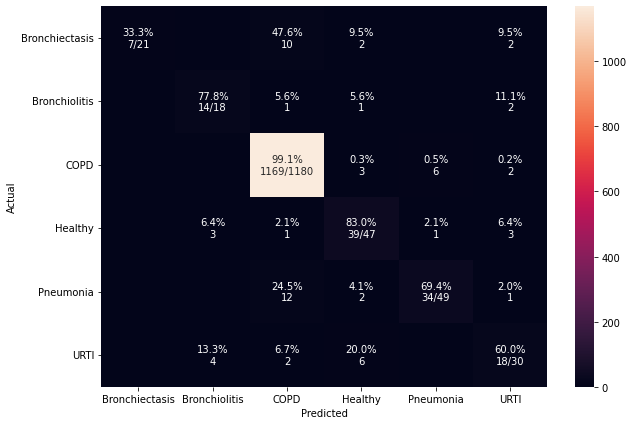

In [40]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = le.classes_

preds = optimal_model.predict({'mel-spectral-input':x_mel1_val,'mel-spectral2-input':x_mel2_val})
#preds = optimal_model.predict(x_mel1_val)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(yval, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')